In [8]:
import ROOT
import my_library.common_analysis_tools as ct
import my_library.constants as constants


In [15]:
ROOT.gStyle.SetOptStat(0)

In [5]:
df_pipkmks = ct.get_dataframe('pipkmks', 'spring', 'data', filtered=False)
df_pimkpks = ct.get_dataframe('pimkpks', 'spring', 'data', filtered=False)

In [6]:
df_pipkmks = df_pipkmks.Define('km_p', 'sqrt(km_px*km_px + km_py*km_py + km_pz*km_pz)')
df_pimkpks = df_pimkpks.Define('kp_p', 'sqrt(kp_px*kp_px + kp_py*kp_py + kp_pz*kp_pz)')

In [10]:
hist_kmp = df_pipkmks.Histo1D(('kmp', 'kmp', 500, 0, 1), 'km_p').GetValue()
hist_kpp = df_pimkpks.Histo1D(('kpp', 'kpp', 500, 0, 1), 'kp_p').GetValue()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c
Info in <TCanvas::Print>: png file kaon_momentum.png has been created


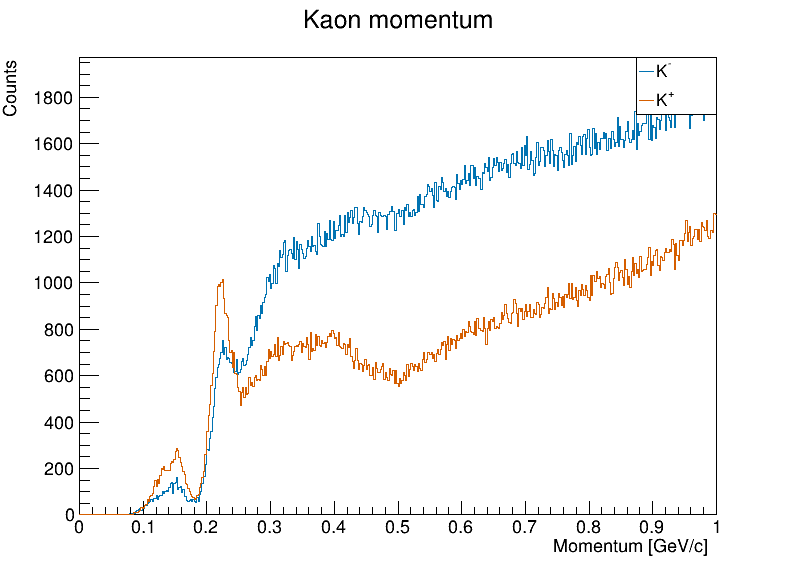

In [16]:
hist_kmp.SetTitle("Kaon momentum")
hist_kmp.GetXaxis().SetTitle("Momentum [GeV/c]")
hist_kmp.GetYaxis().SetTitle("Counts")
hist_kpp.SetTitle("Kaon momentum")
hist_kpp.GetXaxis().SetTitle("Momentum [GeV/c]")
hist_kpp.GetYaxis().SetTitle("Counts")

hist_kmp.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['blue']))
hist_kpp.SetLineColor(ROOT.TColor.GetColor(constants.COLORBLIND_HEX_DICT['red']))
legend = ROOT.TLegend(0.8, 0.8, 0.9, 0.9)
legend.AddEntry(hist_kmp, "K^{-}", "l")
legend.AddEntry(hist_kpp, "K^{+}", "l")

c = ROOT.TCanvas("c", "c", 800, 600)
hist_kmp.Draw()
hist_kpp.Draw("same")
legend.Draw()
c.Draw()
c.SaveAs("kaon_momentum.png")
